# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

C:\Users\csas1756\Documents\GitHub\picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```RUN = Picarro.FullRun(filename)```

and returns two instances of the Merged class.

In [3]:
RUN = pica.FullRun('example_data/HKDS2009_IsoWater_20191119_101154.csv')

Running the corrections for Oxygen 
 ... 
 ...
creating a directory to store the data
11310.0
11311.0
Checking: HUSN01 ...
Standard dev is good
11314.0
Checking: HUSN02 ...
Standard dev is good
11315.0
Checking: HUSN03 ...
Standard dev is good
11316.0
Checking: HUSN04 ...
Standard dev is good
11318.0
Checking: HUSN05 ...
Standard dev is good
11319.0
Checking: HUSN06 ...
Standard dev is good
11320.0
Checking: HUSN07 ...
Standard dev is good
11321.0
Checking: HUSN08 ...
Standard dev is good
11322.0
Checking: HUSN09 ...
Standard dev is good
11323.0
Checking: HUSN10 ...
Standard dev is good
11324.0
Checking: HUSN11 ...
Standard dev is good
11325.0
Checking: HUSN12 ...
Standard dev is good
11327.0
Checking: HUSN13 ...
Standard dev is good
11328.0
Checking: HUSN14 ...
Standard dev is good
11329.0
Checking: HUSN15 ...
Standard dev is good
11330.0
Checking: HUSN16 ...
Standard dev is good
11331.0
Checking: HUSN17 ...
Standard dev is good
11332.0
Checking: HUSN18 ...
Standard dev is good
11333.

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns one object of class **Merge**. This instance of class **Merged** has two class variables: O18 and D, which are themselves of Class **Isotope**, so all the above methods can be called on them.

Example usage:

``` RUN = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



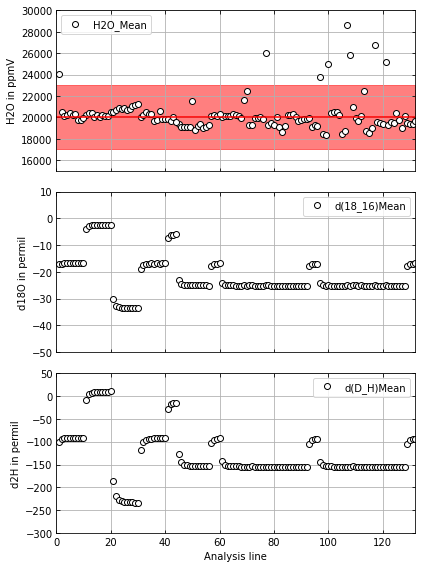

In [4]:
RUN.O18.plotSummary()

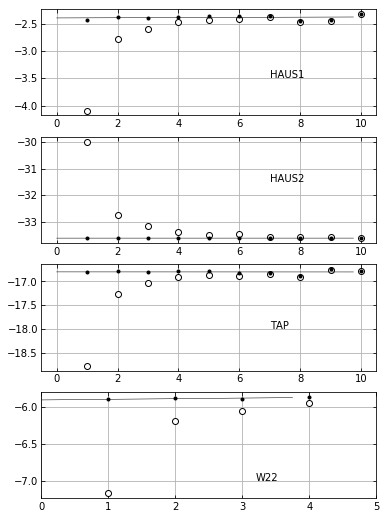

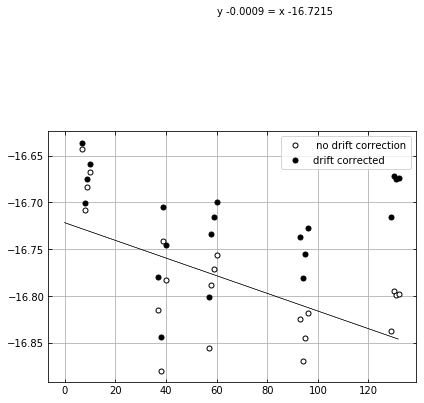

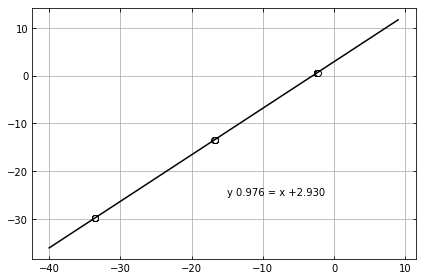

In [5]:
RUN.O18.memCorrPlot("O")
RUN.O18.driftCorrPlot("O")
RUN.O18.VSMOWCorrPlot("O")

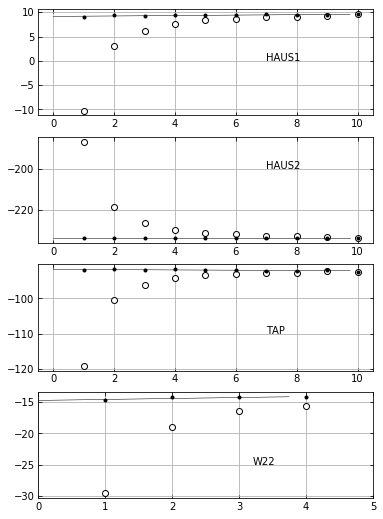

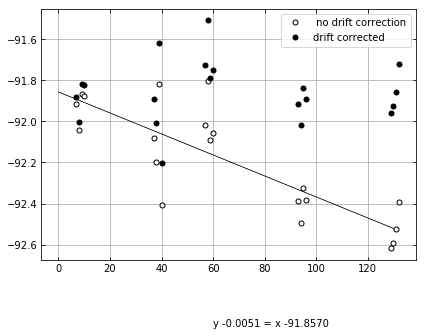

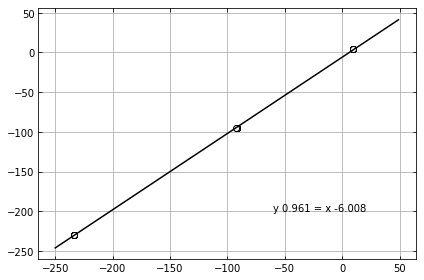

In [6]:
RUN.D.memCorrPlot("H")
RUN.D.driftCorrPlot("H")
RUN.D.VSMOWCorrPlot("H")

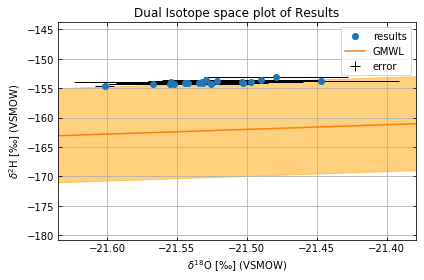

In [7]:
RUN.Plot()

#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [8]:
RUN.coeffs["H"]

1     0.763160
2     0.934382
3     0.969599
4     0.982545
5     0.988727
6     0.991432
7     0.994717
8     0.996451
9     0.998056
10    1.000000
Name: H, dtype: float64

In [9]:
RUN.suggestedReruns()

Checking for triplicates...
Some samples were not triplicated
key
11327.0    HUSN12
11329.0    HUSN14
Name: Identifier 1, dtype: object


Checking for high standard deviations ...
This was a good run


Checking for samples lying outside of the GWML ...
Suggested reruns for following samples, which were outside of the GMWL
key
11314.0    HUSN01
11315.0    HUSN02
11316.0    HUSN03
11318.0    HUSN04
11319.0    HUSN05
11321.0    HUSN07
11322.0    HUSN08
11323.0    HUSN09
11324.0    HUSN10
11325.0    HUSN11
11327.0    HUSN12
11328.0    HUSN13
11329.0    HUSN14
11331.0    HUSN16
11333.0    HUSN18
11334.0    HUSN19
Name: Identifier 1, dtype: object




In [10]:
RUN.O18.run_overview

,Identifier 1,Identifier 2,d18O_raw,stdev. raw,d18O memory,stdev. memory,d18O drift,stdev. drift,d18O vsmow,d18O stdev. vsmow,d18O counts,position
key,,,,,,,,,,,,
11309.0,TAP,_Conditioning,-16.675750,0.027330,-16.675750,0.027330,-16.667743,0.027063,-13.336168,0.026410,4,1.0
11310.0,HAUS1,_Standard,-2.640400,0.525150,-2.384356,0.040759,-2.369755,0.041230,0.617078,0.040236,10,2.0
11311.0,HAUS2,_Standard,-33.067000,1.120777,-33.629224,0.001664,-33.605202,0.003416,-29.865245,0.003334,10,3.0
11312.0,TAP,_Standard,-17.101400,0.604192,-16.799214,0.035335,-16.765772,0.035418,-13.431833,0.034564,10,4.0
11313.0,W22,_Control W22,-6.341250,0.562904,-5.887730,0.016549,-5.847694,0.017370,-2.777003,0.016952,4,5.0
11314.0,HUSN01,SCONTROL,-24.310500,0.947193,-25.110024,0.042606,-25.066219,0.043078,-21.532147,0.042039,4,6.0
11315.0,HUSN02,SCONTROL,-25.057250,0.053413,-25.059380,0.053627,-25.011807,0.052875,-21.479047,0.051600,4,7.0
11316.0,HUSN03,SCONTROL,-25.113750,0.032999,-25.114318,0.033039,-25.062976,0.032205,-21.528983,0.031428,4,8.0
11317.0,TAP,_Control 1,-17.247000,0.505952,-16.804803,0.044236,-16.750164,0.045127,-13.416602,0.044039,3,9.0


In [11]:
RUN.merge

,Identifier 1,Identifier 2,d18O vsmow,d18O stdev. vsmow,d18O counts,d2H vsmow,d2H stdev. vsmow,d2H counts,inside GMWL
key,,,,,,,,,
11314.0,HUSN01,SCONTROL,-21.532147,0.042039,4,-153.973631,0.286983,4,outside
11315.0,HUSN02,SCONTROL,-21.479047,0.051600,4,-153.088878,0.388284,4,outside
11316.0,HUSN03,SCONTROL,-21.528983,0.031428,4,-153.679328,0.101463,4,outside
11318.0,HUSN04,SCONTROL,-21.525314,0.026661,4,-154.194749,0.225882,4,outside
11319.0,HUSN05,SCONTROL,-21.521646,0.048930,4,-153.705163,0.229442,4,outside
11320.0,HUSN06,SCONTROL,-21.496731,0.036622,4,-154.009247,0.221514,4,inside
11321.0,HUSN07,SCONTROL,-21.544261,0.049471,4,-154.078354,0.180566,4,outside
11322.0,HUSN08,SCONTROL,-21.534174,0.044392,3,-154.100642,0.118567,3,outside
11323.0,HUSN09,SCONTROL,-21.542282,0.027359,4,-154.164470,0.102575,4,outside
